<a href="https://colab.research.google.com/github/RiyaThakore/IoU_Illustation/blob/master/IoU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

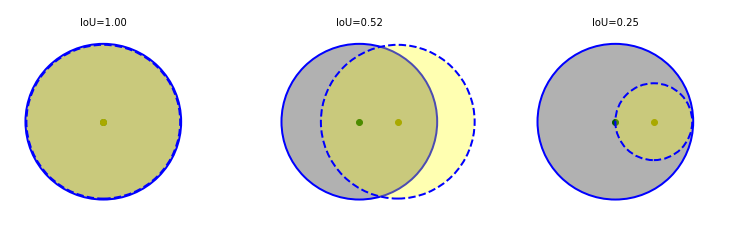

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import tensorflow as tf
from keras import backend as K

def IoU_coeff(y_true, y_pred):
    axes = (1,2) 
    intersection = np.sum(np.abs(y_pred * y_true), axis=axes) 
    mask = np.sum(np.abs(y_true), axis=axes) + np.sum(np.abs(y_pred), axis=axes)
    union = mask - intersection
    smooth = .001
    iou = (intersection + smooth) / (union + smooth)
    return iou

def mean_class(mask, metric):
    if drop_last:
        metric = metric[:,:-1]
        mask = mask[:,:-1]

    if mean_per_class:
        if naive:
            return np.mean(metric, axis=0)
        else:
            return (np.sum(metric * mask, axis=0) + smooth)/(np.sum(mask, axis=0) + .001)
    else:
        if naive:
            return np.mean(metric)
        else:
            class_count = np.sum(mask, axis=0)
            return np.mean(np.sum(metric * mask, axis=0)[class_count!=0]/(class_count[class_count!=0]))
  
def metrics_np(y_true, y_pred, metric_name, metric_type='standard', drop_last = True, mean_per_class=False):
    soft = (metric_type == 'soft') 
    naive = (metric_type == 'naive')
    num_classes = y_pred.shape[-1]
    drop_last = drop_last and num_classes>1
    
    if not soft:
        if num_classes>1:
            y_pred = np.array([ np.argmax(y_pred, axis=-1)==i for i in range(num_classes) ]).transpose(1,2,3,0)
            y_true = np.array([ np.argmax(y_true, axis=-1)==i for i in range(num_classes) ]).transpose(1,2,3,0)
        else:
            y_pred = (y_pred > 0).astype(int)
            y_true = (y_true > 0).astype(int)
    
    iou=IoU_coeff(y_true, y_pred)
    metric = {'iou': iou}[metric_name]
    mask =  np.not_equal(union, 0).astype(int)
    mean_class(mask, metric)
        
def mean_iou(y_true, y_pred):
    return metrics_np(y_true, y_pred, metric_name='iou')

def circle(xy=(0,0), r=4, factor=0.8):
    x0, y0 = xy
    max = factor * r**2
    circle = np.minimum([1], np.maximum([0], r**2 - (x-x0)**2 - (y-y0)**2)/max)    
    return circle

fine_grid = np.meshgrid(np.arange(-7,7.1,0.05), np.arange(-7,7.1,0.05))
x,y = fine_grid
fig, axes = plt.subplots(1,3, figsize = (13,4))
params = [((0,0), 4), ((2,0), 4, ), ((2,0), 2) ]
y_true = circle(factor=0.01)

for i in range(len(axes)):
    axes[i].scatter(0,0, c='g')
    axes[i].add_artist(plt.Circle((0, 0), 4.05, lw=2, edgecolor='b', facecolor=(0,0,0,0.3), zorder=1))
    xy, r = params[i]
    axes[i].scatter(*xy, c='y')
    axes[i].add_artist(plt.Circle(xy, r, lw=2, ls='--', edgecolor='b', facecolor=(1,1,0,0.3), zorder=1))
    
    smooth = 0.001
    y_pred=circle(xy, r, 0.01)
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_pred, y_true))
    iou = np.mean((intersection)/union)
    axes[i].text(0,5, f'IoU={iou:1.2f}', ha='center')
    axes[i].set_axis_off()
    axes[i].set(aspect=1, xlim=(-5,6.1), ylim=(-5,6))
    
fig.savefig('metrics_iou.png',bbox_inches='tight')
